https://www.geeksforgeeks.org/q-learning-in-python/

# Q-Learning in Python

Difficulty Level: Hard

Last Updated: 19 Apr, 2020

Pre-Requisite: Reinforcement Learning @ https://www.geeksforgeeks.org/?p=195593

**Reinforcement Learning** briefly is a paradigm of Learning Process in which a learning agent learns, overtime, to behave optimally in a certain environment by interacting continuously in the environment. The agent during its course of learning experience various different situations in the environment it is in. These are called states. The agent while being in that state may choose from a set of allowable actions which may fetch different rewards(or penalties). The learning agent overtime learns to maximize these rewards so as to behave optimally at any given state it is in.

**Q-Learning** is a basic form of Reinforcement Learning which uses Q-values (also called action values) to iteratively improve the behavior of the learning agent.

1. **Q-Values** or **Action-Values**: Q-values are defined for states and actions. Q(S, A) is an estimation of how good is it to take the action A at the state S. This estimation of Q(S, A) will be iteratively computed using the TD-Update rule which we will see in the upcoming sections.

2. **Rewards** and **Episodes**: An agent over the course of its lifetime starts from a start state, makes a number of transitions from its current state to a next state based on its choice of action and also the environment the agent is interacting in. At every step of transition, the agent from a state takes an action, observes a reward from the environment, and then transits to another state. If at any point of time the agent ends up in one of the terminating states that means there are no further transition possible. This is said to be the completion of an episode.

3. **Temporal Difference** or **TD-Update**: The Temporal Difference or TD-Update rule can be represented as follows:

Q(S, A) <- Q(S, A) + alpha*(R + gamma*Q(S', A') - Q(S, A))

This update rule to estimate the value of Q is applied at every time step of the agents interaction with the environment. The terms used are explained below. :

- `S`: Current State of the agent

- `A`: Current Action Picked according to some policy

- `S'`: Next State where the agent ends up

- `A'`: Next best action to be picked using current Q-value estimation, i.e. pick the action with the maximum Q-value in the next state

- `R`: Current Reward observed from the environment in Response of current action

- $\gamma$ (>0 and <=1): Discounting Factor for Future Rewards
    + Future rewards are less valuable than current rewards so they must be discounted
    + Since Q-value is an estimation of expected rewards from a state, discounting rule applies here as well

- $\alpha$: Step length taken to update the estimation of Q(S, A)

4. **Choosing the Action to take using $\epsilon$-greedy policy**: $\epsilon$-greedy policy of is a very simple policy of choosing actions using the current Q-value estimations. It goes as follows:

- With probability (1 - $\epsilon$) choose the action which has the highest Q-value

- With probability ($\epsilon$) choose any action at random

Now with all the theory required in hand let us take an example. We will use OpenAI’s gym environment to train our Q-Learning model.

Command to Install gym:

```
pip install gym
```

Before starting with example, you will need some helper code in order to visualize the working of the algorithms. There will be two helper files which need to be downloaded in the working directory. One can find the files here:

https://drive.google.com/open?id=1hNRy2nGdFSz6BSRxlmeiL5-UoMR5DBE6

## Step 1: Import required libraries

In [1]:
import gym 
import itertools 
import matplotlib 
import matplotlib.style 
import numpy as np 
import pandas as pd 
import sys 
from collections import defaultdict 
from windy_gridworld import WindyGridworldEnv 
import plotting 
  
matplotlib.style.use('ggplot') 

## Step 2: Create gym environment

In [2]:
env = WindyGridworldEnv() 

## Step 3: Make the $\epsilon$-greedy policy

In [3]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions): 
    """ 
    Creates an epsilon-greedy policy based 
    on a given Q-function and epsilon. 
       
    Returns a function that takes the state 
    as an input and returns the probabilities 
    for each action in the form of a numpy array  
    of length of the action space(set of possible actions). 
    """

    def policyFunction(state): 
   
        Action_probabilities = np.ones(num_actions, dtype = float) * epsilon / num_actions 
        best_action = np.argmax(Q[state]) 
        Action_probabilities[best_action] += (1.0 - epsilon) 
        
        return Action_probabilities 
   
    return policyFunction 

## Step 4: Build Q-Learning Model

In [4]:
def qLearning(env, num_episodes, discount_factor = 1.0, alpha = 0.6, epsilon = 0.1): 
    """ 
    Q-Learning algorithm: Off-policy TD control. 
    Finds the optimal greedy policy while improving 
    following an epsilon-greedy policy
    """
       
    # Action value function 
    # A nested dictionary that maps 
    # state -> (action -> action-value). 
    Q = defaultdict(lambda: np.zeros(env.action_space.n)) 
   
    # Keeps track of useful statistics 
    stats = plotting.EpisodeStats( 
        episode_lengths = np.zeros(num_episodes), 
        episode_rewards = np.zeros(num_episodes))     
       
    # Create an epsilon greedy policy function 
    # appropriately for environment action space 
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n) 
       
    # For every episode 
    for ith_episode in range(num_episodes): 
           
        # Reset the environment and pick the first action 
        state = env.reset() 
           
        for t in itertools.count(): 
               
            # get probabilities of all actions from current state 
            action_probabilities = policy(state) 
   
            # choose action according to  
            # the probability distribution 
            action = np.random.choice(np.arange(len(action_probabilities)), p = action_probabilities) 
   
            # take action and get reward, transit to next state 
            next_state, reward, done, _ = env.step(action) 
   
            # Update statistics 
            stats.episode_rewards[ith_episode] += reward 
            stats.episode_lengths[ith_episode] = t 
               
            # TD Update 
            best_next_action = np.argmax(Q[next_state])     
            td_target = reward + discount_factor * Q[next_state][best_next_action] 
            td_delta = td_target - Q[state][action] 
            Q[state][action] += alpha * td_delta 
   
            # done is True if episode terminated    
            if done: 
                break
                   
            state = next_state 
       
    return Q, stats 

## Step 5: Train the model

In [5]:
Q, stats = qLearning(env, 1000) 

## Step 6: Plot important statistics

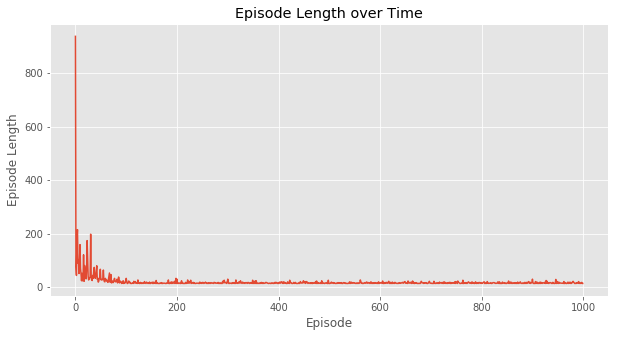

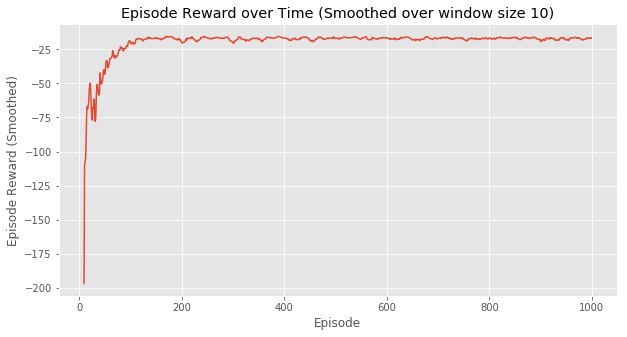

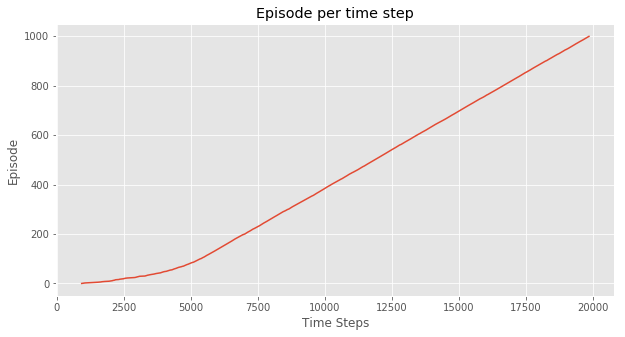

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [6]:
plotting.plot_episode_stats(stats) 

## Conclusion

We see that in the Episode Reward over time plot that the episode rewards progressively increase over time and ultimately levels out at a high reward per episode value which indicates that the agent has learnt to maximize its total reward earned in an episode by behaving optimally at every state.